LINEAR REGRESSION MODEL

MODELO SIN NORMALIZAR

In [60]:
import pandas as pd
import matplotlib.pyplot as plt 


In [61]:
train_data = pd.read_csv("../data/raw/sel_train.csv")
test_data = pd.read_csv("../data/raw/sel_test.csv")

train_data.head()

,age,sex,bmi,smoker,charges
0,63.0,0.0,36.85,1.0,13887.9685
1,29.0,1.0,32.11,1.0,4433.9159
2,35.0,1.0,27.74,0.0,20984.0936
3,30.0,1.0,31.57,1.0,4837.5823
4,22.0,0.0,28.82,1.0,2156.7518


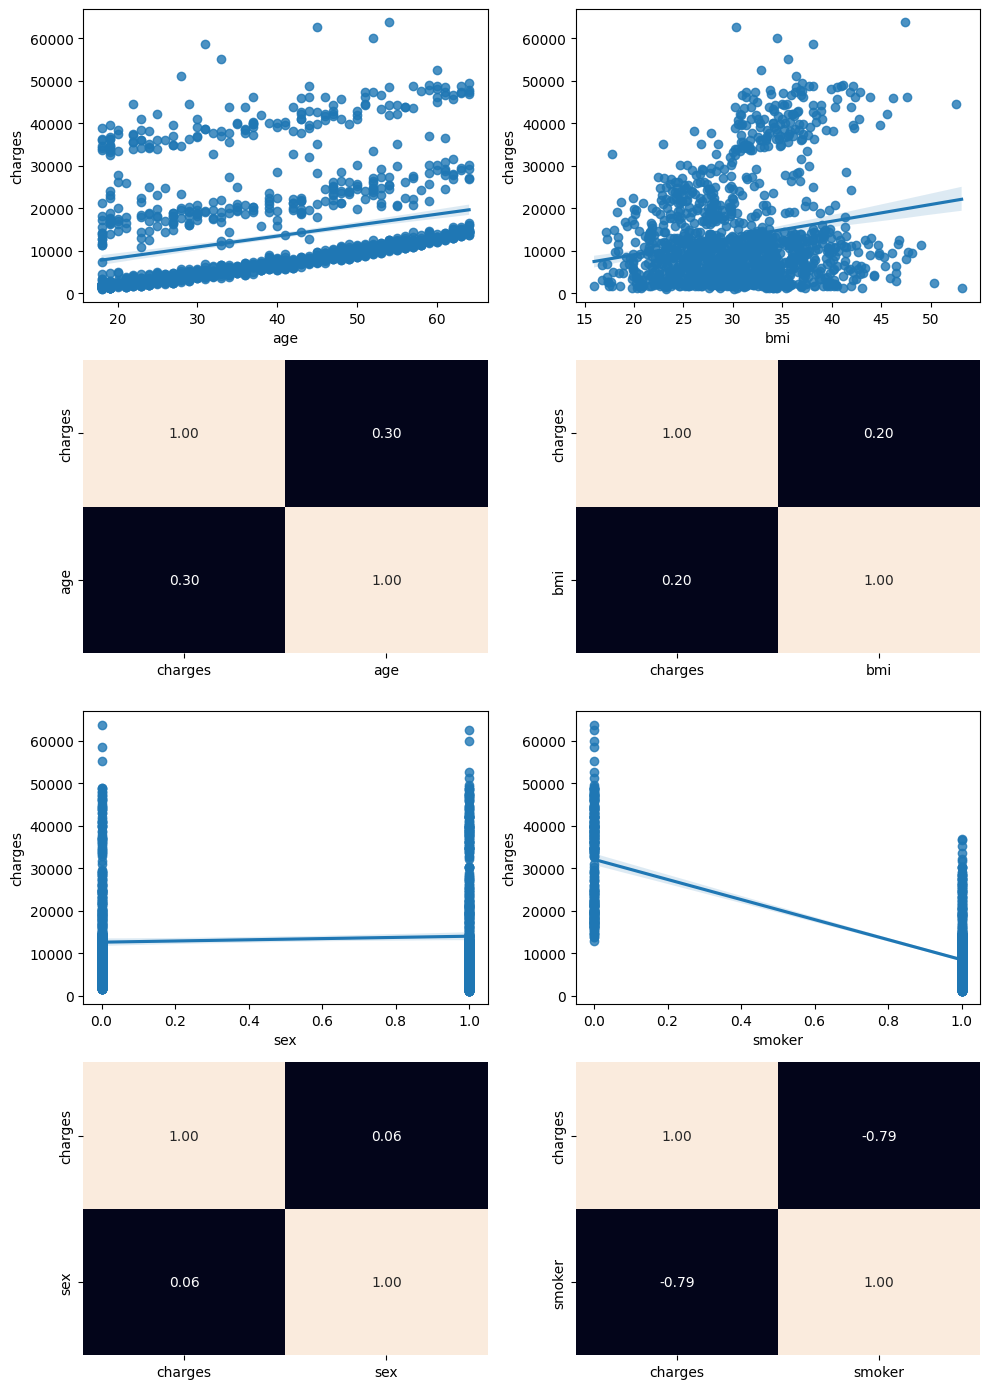

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data = pd.concat([train_data, test_data])

sns.regplot(data = total_data, x = "age", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data[["charges", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data, x = "bmi", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data[["charges", "bmi"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data, x = "sex", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data[["charges", "sex"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data, x = "smoker", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data[["charges", "smoker"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

observamos poco correlación: entre las variables observadas, sin embargo las que mas llegan a destacar es la variable de edad y bmi


In [63]:
X_train = train_data.drop(["charges"], axis = 1)
y_train = train_data["charges"]
X_test = test_data.drop(["charges"], axis = 1)
y_test = test_data["charges"]

ENTRENAMOS EL MODELO

In [64]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

OBSERVAMOS LOS COEFICIENTES

In [65]:
print(f"Intercep (a): {model.intercept_}")
print(f"Coefficients (b1, b2): {model.coef_}")

Intercep (a): 12379.976329881496
Coefficients (b1, b2): [ 2.58712894e+02  1.75736707e+01  3.22627452e+02 -2.39966330e+04]


In [66]:
y_pred = model.predict(X_test)
y_pred

array([ 1.01190430e+04,  3.06645920e+04,  4.66627528e+03,  5.35486523e+03,
        1.09690428e+04,  9.41454214e+03,  6.44343848e+03,  2.11512273e+03,
        9.72878738e+03,  3.51271139e+04,  1.34318641e+04,  1.54297586e+04,
        1.28973047e+04,  1.37462542e+04,  4.91780191e+03,  1.11466595e+04,
        1.03340304e+04,  3.26943313e+04,  2.82306364e+04,  6.14373740e+03,
        3.79656718e+04,  5.10949676e+03,  1.12728755e+04,  1.39975131e+04,
        1.17368000e+04,  2.93381469e+03,  1.01989456e+04,  1.63936321e+04,
        4.45216812e+03,  1.13520908e+04,  7.87263004e+03,  1.21544790e+04,
        3.16177098e+04,  1.46605118e+04,  3.04765620e+04,  1.37694499e+04,
        3.78415769e+03,  1.16604678e+04,  2.89346232e+04,  3.13851503e+04,
        8.09049890e+03,  1.27747063e+04,  2.85954243e+04,  7.01052830e+03,
        1.49418086e+04,  8.67501824e+03,  1.49240649e+04,  3.67441356e+04,
        1.57928380e+04,  4.74954184e+02,  3.65698755e+03,  3.23804552e+04,
        1.10903721e+04,  

In [79]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


print(f"Error cuadrático medio: {mean_squared_error(y_test, y_pred)}")
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

print(f"raiz Error cuadrático medio: {rmse}")

print(f"Coeficiente de determinación: {r2_score(y_test, y_pred)}")

Error cuadrático medio: 41524226.846012674
raiz Error cuadrático medio: 6443.929456939506
Coeficiente de determinación: 0.7189206676642774


AHORA ESTUDIAMOS EL MODELO NORMALIZADO

In [68]:
train_norm_data = pd.read_csv("../data/raw/norm_sel_train.csv")
test_norm_data = pd.read_csv("../data/raw/norm_sel_test.csv")

train_norm_data.head()

,age_n,sex_n,bmi_n,smoker_n,charges
0,1.702634,-1.016031,1.007055,0.504673,13887.9685
1,-0.736046,0.984222,0.228402,0.504673,4433.9159
2,-0.305690,0.984222,-0.489470,-1.981481,20984.0936
3,-0.664320,0.984222,0.139695,0.504673,4837.5823
4,-1.238127,-1.016031,-0.312055,0.504673,2156.7518


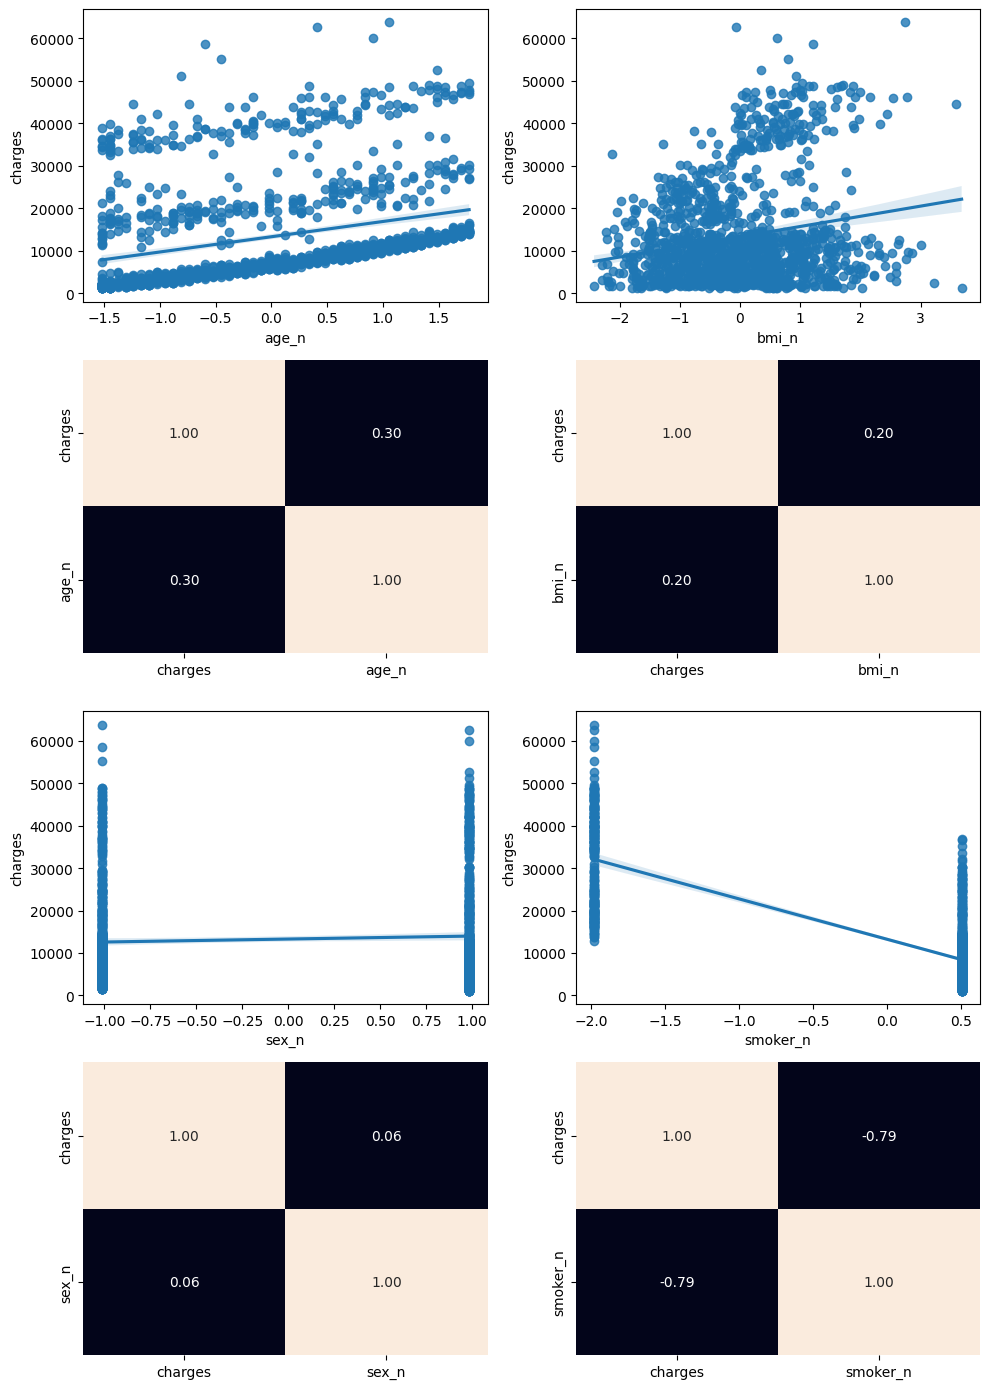

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(4, 2, figsize = (10, 14))
total_data2 = pd.concat([train_norm_data, test_norm_data])

sns.regplot(data = total_data2, x = "age_n", y = "charges", ax = axis[0, 0])
sns.heatmap(total_data2[["charges", "age_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(data = total_data2, x = "bmi_n", y = "charges", ax = axis[0, 1])
sns.heatmap(total_data2[["charges", "bmi_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

sns.regplot(data = total_data2, x = "sex_n", y = "charges", ax = axis[2, 0])
sns.heatmap(total_data2[["charges", "sex_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], cbar = False)

sns.regplot(data = total_data2, x = "smoker_n", y = "charges", ax = axis[2, 1])
sns.heatmap(total_data2[["charges", "smoker_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1], cbar = False)

plt.tight_layout()
plt.show()

In [70]:
X_train_n = train_norm_data.drop(["charges"], axis = 1)
y_train_n = train_norm_data["charges"]
X_test_n = test_norm_data.drop(["charges"], axis = 1)
y_test_n = test_norm_data["charges"]

In [71]:
from sklearn.linear_model import LinearRegression

model_n = LinearRegression()
model_n.fit(X_train_n, y_train_n)


LinearRegression()

In [72]:
print(f"Intercep (a): {model_n.intercept_}")
print(f"Coefficients (b1, b2): {model_n.coef_}")

Intercep (a): 13331.987597089808
Coefficients (b1, b2): [ 3.60696754e+03  8.78572418e+00  1.96397407e+03 -9.65211014e+03]


In [73]:
y_pred_n = model_n.predict(X_test_n)
y_pred_n

array([ 1.01190430e+04,  3.06645920e+04,  4.66627528e+03,  5.35486523e+03,
        1.09690428e+04,  9.41454214e+03,  6.44343848e+03,  2.11512273e+03,
        9.72878738e+03,  3.51271139e+04,  1.34318641e+04,  1.54297586e+04,
        1.28973047e+04,  1.37462542e+04,  4.91780191e+03,  1.11466595e+04,
        1.03340304e+04,  3.26943313e+04,  2.82306364e+04,  6.14373740e+03,
        3.79656718e+04,  5.10949676e+03,  1.12728755e+04,  1.39975131e+04,
        1.17368000e+04,  2.93381469e+03,  1.01989456e+04,  1.63936321e+04,
        4.45216812e+03,  1.13520908e+04,  7.87263004e+03,  1.21544790e+04,
        3.16177098e+04,  1.46605118e+04,  3.04765620e+04,  1.37694499e+04,
        3.78415769e+03,  1.16604678e+04,  2.89346232e+04,  3.13851503e+04,
        8.09049890e+03,  1.27747063e+04,  2.85954243e+04,  7.01052830e+03,
        1.49418086e+04,  8.67501824e+03,  1.49240649e+04,  3.67441356e+04,
        1.57928380e+04,  4.74954184e+02,  3.65698755e+03,  3.23804552e+04,
        1.10903721e+04,  

In [74]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test_n, y_pred_n)
rmse = sqrt(mse)

print(f"Error cuadrático medio: {mse}")
print(f"Raíz cuadrada del error cuadrático medio (RMSE): {rmse}")
print(f"Coeficiente de determinación: {r2_score(y_test_n, y_pred_n)}")

Error cuadrático medio: 41524226.84601272
Raíz cuadrada del error cuadrático medio (RMSE): 6443.92945693951
Coeficiente de determinación: 0.7189206676642771
